In [1]:
# Import packages
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [2]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [6]:
ds_all

<xarray.Dataset>
Dimensions:   (ensemble: 30, time: 1812, xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time      (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: ensemble
Data variables:
    MI        (ensemble, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1812, 180, 360), meta=np.ndarray>
Attributes:
    author:     Karl Stein
    history:    Calculated with /proj/shared_data/ESM2M/scripts/calc_ESM2M_de...
    reference:  Penn et al., Science 362, eaat1327 (2018)

In [15]:
ds_first = ds_all.sel(ensemble=0).groupby('time.year')

In [20]:
def graph(ds, in_year, plot, title):
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    Z = ds['MI'].sel(year=in_year).squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)
    if plot == axs[0,0]:
        cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05)
        cbar.set_label('metabolic index',fontsize=12)
    
    # Zoom in on a region
    # ax.set_extent([120,180,-30,30])

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/d

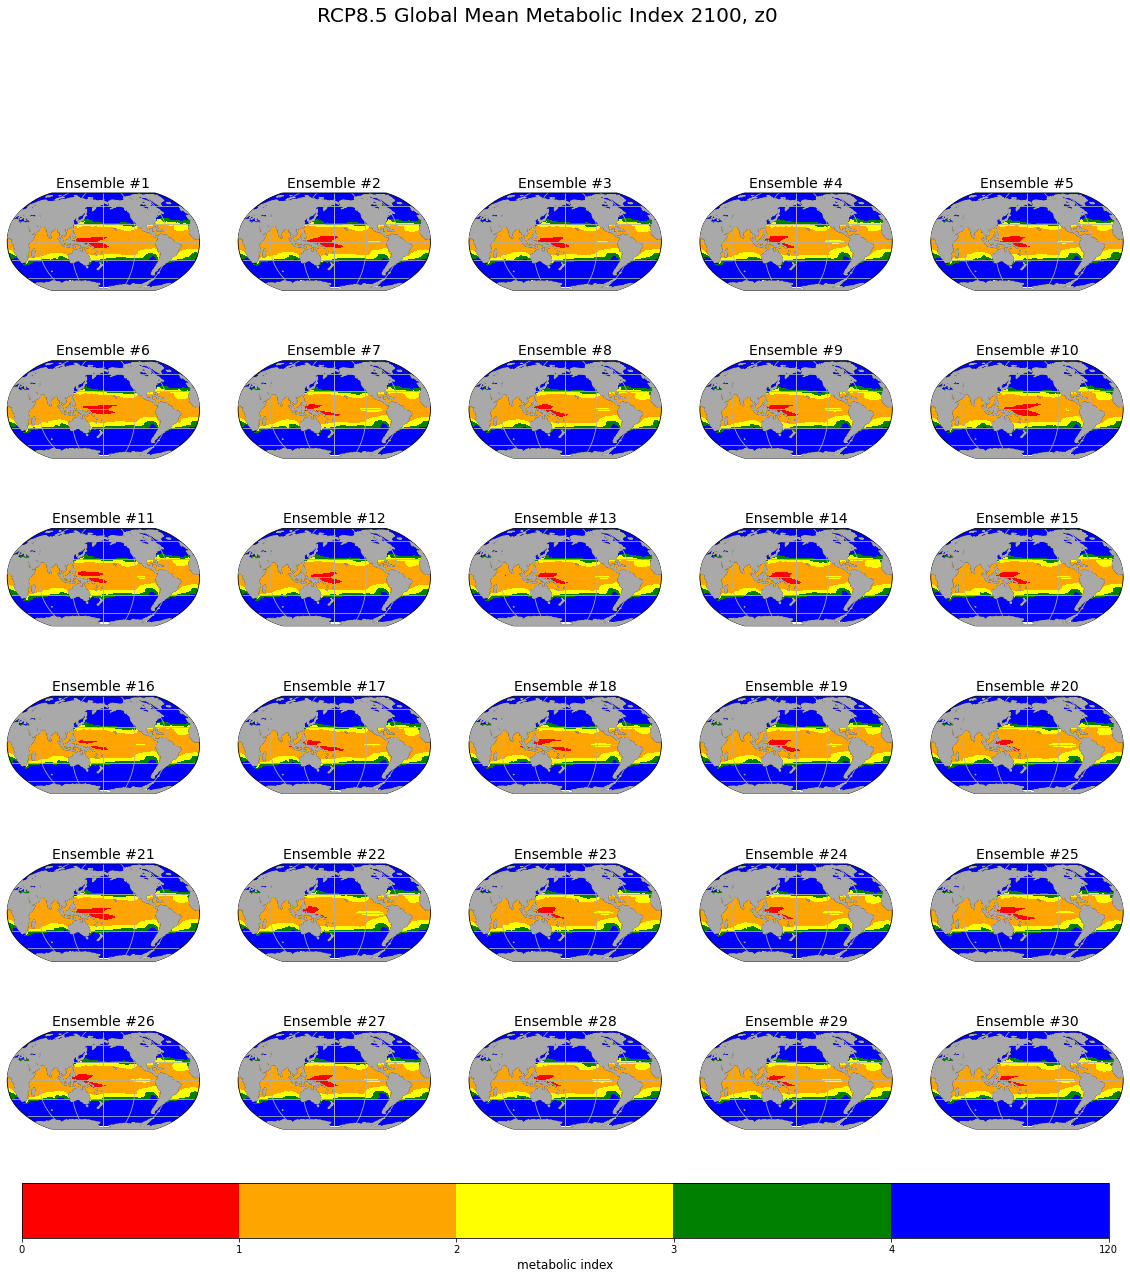

In [22]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Mean Metabolic Index 2100, z0',fontsize=20) # Specify a figure title
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum).groupby('time.year').mean(dim='time')
        graph(ds_ens,2100,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1